# Statistical Testing for Soybeans

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from scripts.ARIMAForecasterV2 import *
from scripts.dataloader import *
import sqlite3
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt
from pprint import pprint

In [5]:
conn = sqlite3.connect("../data/database.db")

# Load the data from the specified table
df = pd.read_sql_query("SELECT * FROM commdity_log_returns_with_undeseaonalised_cpi", conn,
                       index_col='index', parse_dates='index')

display(df.head())

def shift_lags_for_enso(df, factor, lags=24):
    """Function to create lagged columns for a given factor."""
    df_copy = df.copy()
    for lag in range(1, lags+1):
        df_copy[f"{factor}_{lag}"] = df_copy[factor].shift(lag)
    return df_copy

# applying the function to obtain 24 lags for the 'mei_jra55' column
soybeans = df[['soybeans', 'lr_soybeans', 'real_soybeans', 'mei_jra55']]
soybeans_mei = shift_lags_for_enso(soybeans, 'mei_jra55', lags=24)

soybeans_mei.tail()

,wheat_us_hrw,maize,rice_05,rice_05_vnm,soybeans,mei_jra55,mei_nnr1,lr_wheat_us_hrw,lr_maize,lr_rice_05,lr_rice_05_vnm,lr_soybeans,cpi,inflation,d_inflation,real_wheat_us_hrw,real_maize,real_rice_05,real_rice_05_vnm,real_soybeans
index,,,,,,,,,,,,,,,,,,,,
1970-01-01,52.18,58.4,140.45,NaN,107.0,0.061827,0.228956,0.0,0.109173,-0.136987,NaN,0.006658,16.03591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-01,52.18,58.4,133.38,NaN,110.0,0.143068,0.195680,0.0,0.000000,-0.051649,NaN,0.027652,16.10818,0.004497,0.003416,0.004497,0.004497,0.059204,NaN,-0.022532
1970-03-01,52.18,58.4,126.31,NaN,111.0,0.056751,0.030165,0.0,0.000000,-0.054463,NaN,0.009050,16.19254,0.005223,0.003792,0.005223,0.005223,0.063124,NaN,-0.003792
1970-04-01,52.18,58.4,121.59,NaN,112.0,-0.067806,-0.162313,0.0,0.000000,-0.038084,NaN,0.008969,16.31608,0.007600,0.005723,0.007600,0.007600,0.047494,NaN,-0.001356
1970-05-01,52.18,58.4,121.59,NaN,115.0,-0.387426,-0.342435,0.0,0.000000,0.000000,NaN,0.026433,16.33867,0.001384,0.000642,0.001384,0.001384,0.001384,NaN,-0.024405


,soybeans,lr_soybeans,real_soybeans,mei_jra55,mei_jra55_1,mei_jra55_2,mei_jra55_3,mei_jra55_4,mei_jra55_5,mei_jra55_6,...,mei_jra55_15,mei_jra55_16,mei_jra55_17,mei_jra55_18,mei_jra55_19,mei_jra55_20,mei_jra55_21,mei_jra55_22,mei_jra55_23,mei_jra55_24
index,,,,,,,,,,,,,,,,,,,,,
2018-08-01,376.77,-0.001061,0.003021,0.144861,-0.463482,-0.789559,-1.095115,-1.532157,-1.120411,-0.858110,...,-0.073153,-0.316034,-0.608435,-0.491271,-0.569526,-0.536709,-0.616287,-0.741304,-0.480338,-0.493889
2018-09-01,356.87,-0.054263,0.057849,0.364861,0.144861,-0.463482,-0.789559,-1.095115,-1.532157,-1.120411,...,-0.427037,-0.073153,-0.316034,-0.608435,-0.491271,-0.569526,-0.536709,-0.616287,-0.741304,-0.480338
2018-10-01,367.96,0.030603,-0.027992,0.213739,0.364861,0.144861,-0.463482,-0.789559,-1.095115,-1.532157,...,-0.711992,-0.427037,-0.073153,-0.316034,-0.608435,-0.491271,-0.569526,-0.536709,-0.616287,-0.741304
2018-11-01,374.04,0.016389,-0.019089,0.109718,0.213739,0.364861,0.144861,-0.463482,-0.789559,-1.095115,...,-0.873442,-0.711992,-0.427037,-0.073153,-0.316034,-0.608435,-0.491271,-0.569526,-0.536709,-0.616287
2018-12-01,380.53,0.017202,-0.018951,-0.066669,0.109718,0.213739,0.364861,0.144861,-0.463482,-0.789559,...,-1.035097,-0.873442,-0.711992,-0.427037,-0.073153,-0.316034,-0.608435,-0.491271,-0.569526,-0.536709


Given AR model without exogenous predictors (Null model)

$$
Y_t = \phi_1Y_{t-1} + \phi_2Y_{t-2} + \dots + \phi_pY_{t-p} + \epsilon_t
$$

And the AR model with exogenous predictors (Alternative model)

$$
H_1$: $Y_t = \phi_1Y_{t-1} + \phi_2Y_{t-2} + \dots + \phi_pY_{t-p} + \beta X_t\epsilon_t
$$ 

where
- $\beta\ne 0$
- $Y_t$ is the dependent time series variable at time $t$
- $X_t$ is the exogenous predictor at time $t$
- $\phi_1,\phi_2,\dots,\phi_p$ are the AR coefficients
- $\beta$: is the coefficient for the exogenous predictor
- $\epsilon_t$: is the error term at time $t$

In [6]:
date_range = dict(start='2008-01-01')
train_years = 5

null_model = SARIMAForecaster(data=soybeans_mei, endog='soybeans', exog=None, max_history=12*train_years).construct_model(date_range["start"], with_exog=False)
alt_model = SARIMAForecaster(data=soybeans_mei, endog='soybeans', exog=['mei_jra55_1'], max_history=12*train_years).construct_model(date_range["start"], with_exog=True)

null_model.summary(), alt_model.summary()

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:               soybeans   No. Observations:                   61
 Model:               SARIMAX(1, 0, 0)   Log Likelihood                -268.776
 Date:                Sun, 17 Sep 2023   AIC                            541.552
 Time:                        16:02:05   BIC                            545.774
 Sample:                    12-01-2002   HQIC                           543.207
                          - 12-01-2007                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1          0.9988      0.003    295.861      0.000       0.992       1.005
 sigma2       356.0794     53.344      6.675      0.000     251.527   

Reference: https://timeseriesreasoning.com/contents/f-test-for-regression-analysis/

1. **Construct the null model ($H_0$)**: the null model (or baseline model) is constructed without an exogenous variable. It serves as the baseline for comparison
2. **Construct the alternative model ($H_1$)**: the alternative model includes the exogenous variable. The idea is to check if adding this variable provides a significantly better fit to the data
3. **Compute the Log-Likelihood**: For each model, compute the log-likelihood. This value is a measure of how well the model fits the data.
4. **Compute the Likelihood Ratio Test Statistic**: $LR = -2\times (LL_0 - LL_1)$
    - where:
        - $LL_0$ is the log likelihood for the null model
        - $LL_1$ is the log likelihood for the alternative model
5. **Compute the F-statistic**: $F=\frac{LR}{k_1 - k_0}$
    - where:
        - $k_0$ is the number of parameters in the null model
        - $k_1$ is the number of parameters in the alternative model

In [7]:
def F_statistics_log_likelihood(null_model, alt_model, alpha=0.05):
    LL0, LL1 = null_model.llf, alt_model.llf
    LR = -2 * (LL0 - LL1)
    
    k0, k1 = len(null_model.params), len(alt_model.params)
    n = len(null_model.resid)
    
    F = LR / (k1 - k0)
    df1, df2 = k1 - k0, n - k1
    
    critical_value = f.ppf(1-alpha, df1, df2)
    
    return F, critical_value

## Identify the Probability Density Function of the F-statistic

$$
X \sim F(d_1, d_2) = \frac{X_1/d_1}{X_2/d_2}, \text{where } X_1 \sim \chi^2_{d_1} \text{ and } X_2 \sim \chi^2_{d_2}  
$$

where

- $d_1 = k_2 - k_1$
- $d_2 = n - k_2$

In [8]:
F_statistics_log_likelihood(null_model, alt_model)

(0.015824918112798514, 4.006872886332733)

## Conclusion

- If F is statistically significannt, it indicates that the alternative model provides a significantly better fit to the data
- If F is not statistically significannt, it suggests that there's no significant difference in fit between the two models.

In [9]:
def print_conclusion(F, F_critical, alpha=0.05):  
    if F > F_critical:
        conclusion = f"""
        Calculated F-statistic: {F:.3f}
        Critical F-statistic at α = {alpha}: {F_critical:.3f}
        
        Conclusion:
        -------------
        Since F > F_critical at α = {alpha}, we reject the null hypothesis in favor of 
        the alternative hypothesis. This indicates that the alternative model (with more predictors)
        provides a significantly better fit to the data_soybeans than the null model (with fewer predictors).
        """
    else:
        conclusion = f"""
        Calculated F-statistic: {F:.3f}
        Critical F-statistic at α = {alpha}: {F_critical:.3f}
        
        Conclusion:
        -------------
        Since F ≤ F_critical at α = {alpha}, the evidence suggests that the additional
        predictors in the alternative model do not offer a statistically significant 
        improvement over the null model.
        The differences in model fits can be attributed to random chance.
        """
    
    print(conclusion)

In [10]:
print_conclusion(*F_statistics_log_likelihood(null_model, alt_model, alpha=0.29))


        Calculated F-statistic: 0.016
        Critical F-statistic at α = 0.05: 1.140
        
        Conclusion:
        -------------
        Since F ≤ F_critical at α = 0.05, the evidence suggests that the additional
        predictors in the alternative model do not offer a statistically significant 
        improvement over the null model.
        The differences in model fits can be attributed to random chance.
        


## Check ENSO impacts 

In [11]:
exogs = [f'mei_jra55_{p}' for p in range(1,25)]

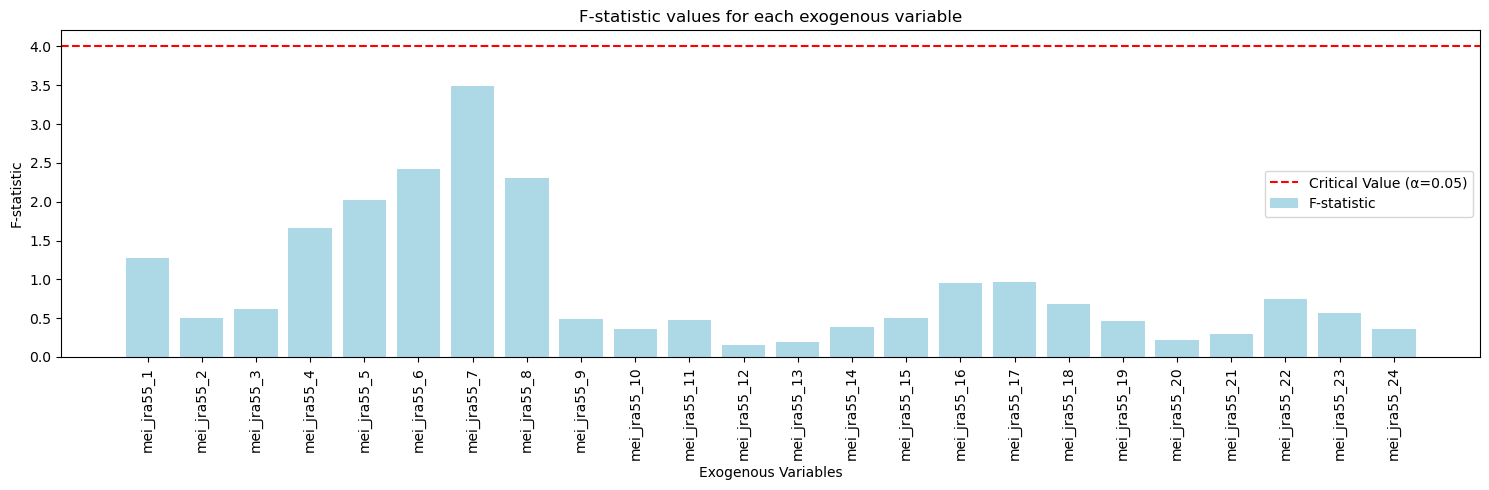

In [12]:
date_range = dict(end='2018-01-01')
train_years = 5

F_stats = []
for exog in exogs:
    null_model = SARIMAForecaster(data=soybeans_mei, endog='lr_soybeans', exog=None, max_history=12*train_years).construct_model(date_range["end"], with_exog=False)
    alt_model = SARIMAForecaster(data=soybeans_mei, endog='lr_soybeans', exog=[exog], max_history=12*train_years).construct_model(date_range["end"], with_exog=True)

    F_stats.append(list(map(lambda x: round(x, 4), F_statistics_log_likelihood(null_model, alt_model))))

f_values = [row[0] for row in F_stats]
critical_values = [row[1] for row in F_stats]

# Create a bar plot
plt.figure(figsize=(15, 5))
plt.bar(exogs, f_values, color='lightblue', label='F-statistic')
plt.axhline(y=critical_values[0], color='red', linestyle='--', label=f'Critical Value (α=0.05)')

# Highlight bars where F-statistic is negative
for idx, value in enumerate(f_values):
    if value < 0:
        plt.bar(exogs[idx], f_values[idx], color='orange')

plt.xticks(rotation=90)
plt.xlabel('Exogenous Variables')
plt.ylabel('F-statistic')
plt.title('F-statistic values for each exogenous variable')
plt.legend()
plt.tight_layout()
plt.show()

## ENSO impact Conclusion

From the results:

- Column 0 represents the calculated F-statistic for each exogenous variable.
- Column 1 represents the critical value at \( \\alpha = 0.05 \).

When comparing the F-statistic to the critical value:

1. If the F-statistic > critical value, then the exogenous variable significantly improves the fit of the model.
2. If the F-statistic is approximately equal to zero or is less than the critical value but greater than zero, then adding the exogenous variable doesn't provide a significant improvement.

Based on the computed F-statistics:
- None of the exogenous variables have an F-statistic greater than the critical value for $\alpha = 0.05$, suggesting that these variables do not provide a statistically significant improvement in model fit at the 0.05 significance level.
- However, `mei_jra55_7` out of 24 exogenous variables have an F-statistic greater than the critical value for $\alpha = 0.1$, indicating that they might provide a statistically significant improvement to the model fit at the 0.1 significance level.

In essence, while the exogenous variables do not significantly improve the model fit at the $\alpha = 0.05$ level, some of them become significant at the $\alpha = 0.1$ level. to the model fit.


## Exam the training length impact

In [14]:
date_range = dict(end='2018-01-01')
train_years = range(2, 11)

F_stats = []

for train_year in train_years:
    f_stats = []
    for exog in exogs:
        
        null_model = SARIMAForecaster(data=soybeans_mei, endog='lr_soybeans', exog=None, max_history=12*train_year).construct_model(date_range["end"], with_exog=False)
        alt_model = SARIMAForecaster(data=soybeans_mei, endog='lr_soybeans', exog=[exog], max_history=12*train_year).construct_model(date_range["end"], with_exog=True)
   
        f_stats.append(list(map(lambda x: round(x, 4), F_statistics_log_likelihood(null_model, alt_model))))

    F_stats.append(f_stats)

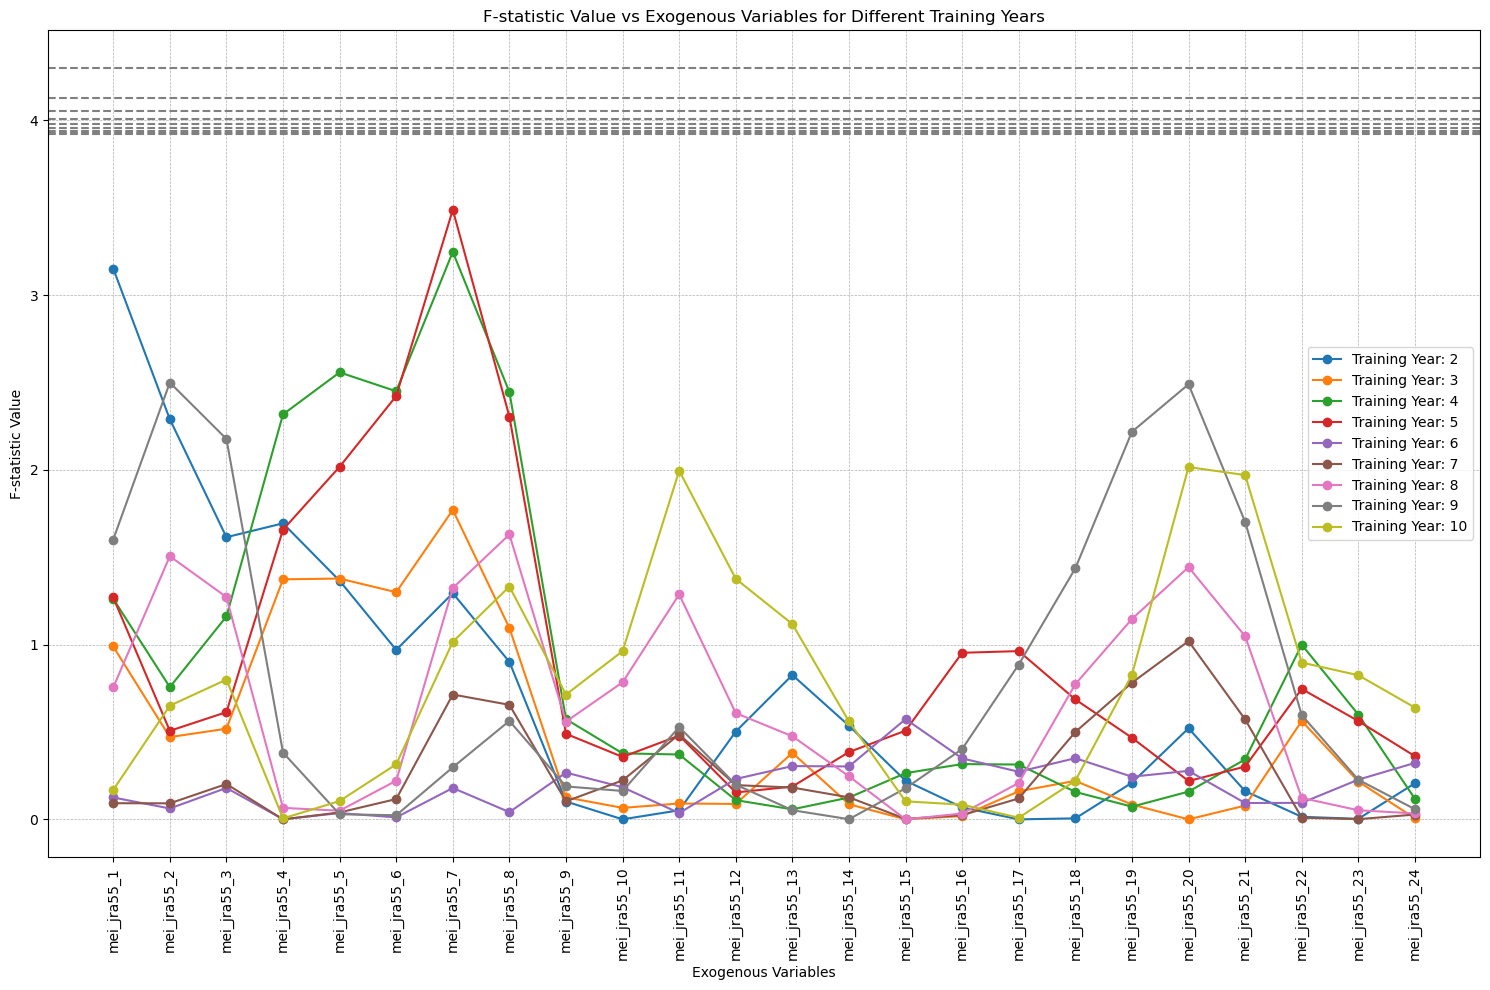

In [15]:
F_values = [[entry[0] for entry in yearly_data_soybeans] for yearly_data_soybeans in F_stats]
threshold_values = [yearly_data_soybeans[0][1] for yearly_data_soybeans in F_stats]  # assuming threshold value is constant across exogenous variables for a given year

plt.figure(figsize=(15,10))
for idx, (f_value, year) in enumerate(zip(F_values, train_years)):
    plt.plot(exogs, f_value, label=f"Training Year: {year}", marker='o')
    plt.axhline(y=threshold_values[idx], color='gray', linestyle='--')

plt.xticks(rotation=90)
plt.xlabel("Exogenous Variables")
plt.ylabel("F-statistic Value")
plt.title("F-statistic Value vs Exogenous Variables for Different Training Years")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


Conclusion: Based on the majority of the F-statistic values across different training years, it can be concluded that the ENSO factor mei does not have a statistically significant effect on lr_soybeans for most of the lag, however lag 7 looks the most influential, more data for training, we get a better result.

## Check Training Window Impacts

In [16]:
dates = ['1980-01-01','2000-01-01', "2005-01-01", '2010-01-01', '2015-01-01']
train_year = 5
F_stats = []

for date in dates:
    f_stats = []
    for exog in exogs:
        
        null_model = SARIMAForecaster(data=soybeans_mei, endog='lr_soybeans', exog=None, max_history=12*train_year).construct_model(date, with_exog=False)
        alt_model = SARIMAForecaster(data=soybeans_mei, endog='lr_soybeans', exog=[exog], max_history=12*train_year).construct_model(date, with_exog=True)
    
        f_stats.append(list(map(lambda x: round(x, 4), F_statistics_log_likelihood(null_model, alt_model))))

    F_stats.append(f_stats)

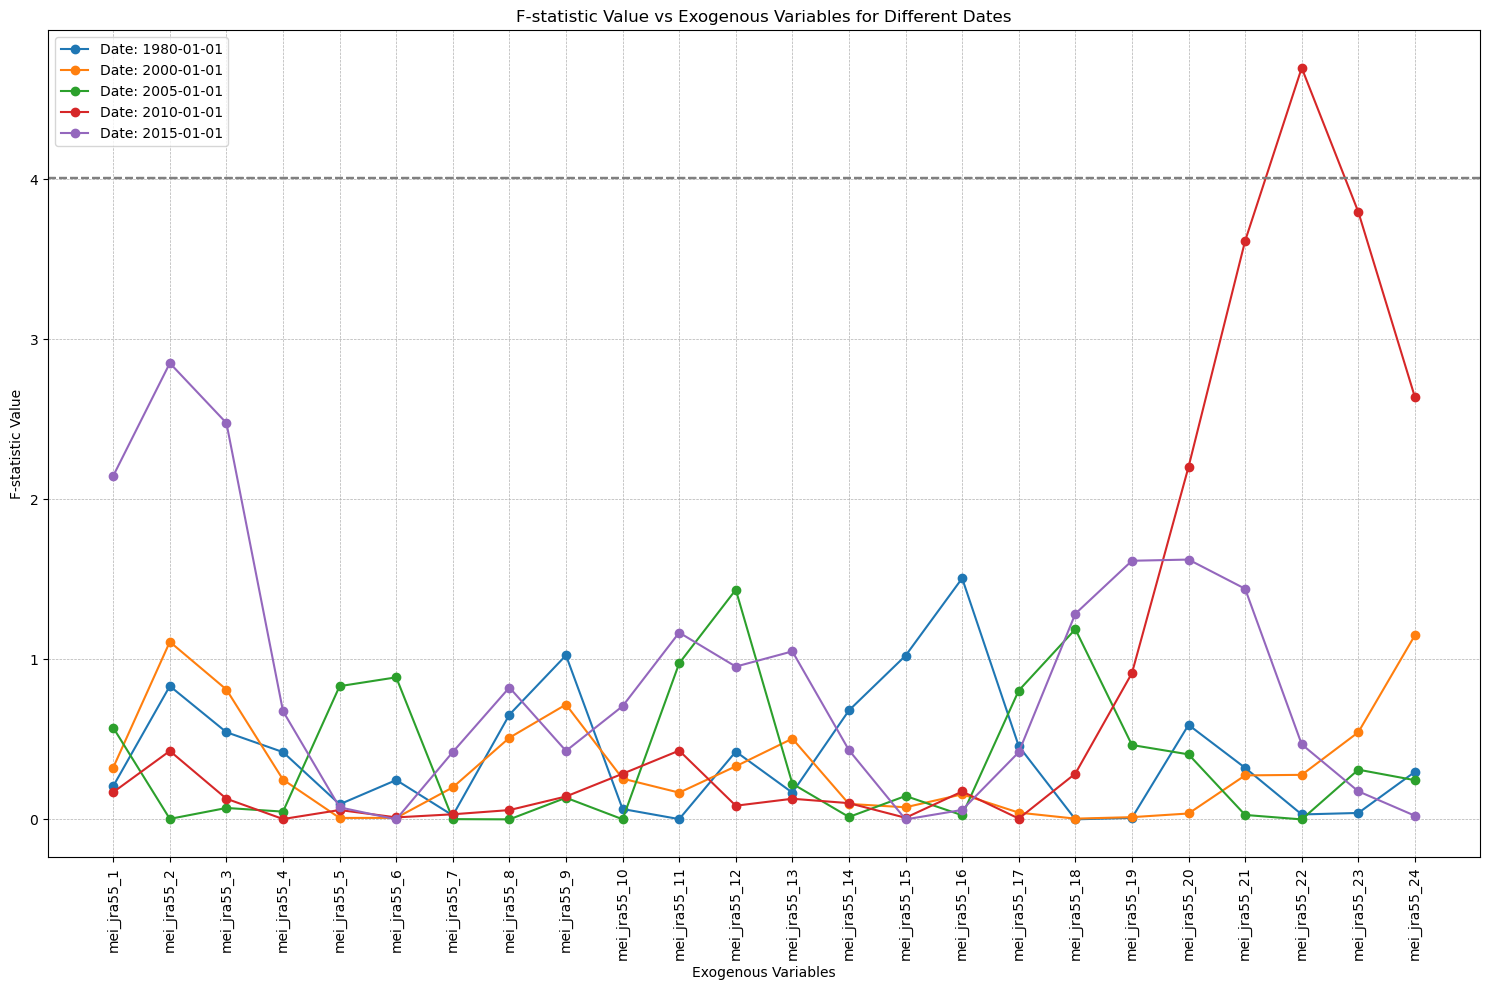

In [17]:
F_values = [[entry[0] for entry in yearly_data_soybeans] for yearly_data_soybeans in F_stats]
threshold_values = [yearly_data_soybeans[0][1] for yearly_data_soybeans in F_stats]  # assuming threshold value is constant across exogenous variables for a given date

plt.figure(figsize=(15,10))
for idx, (f_value, date) in enumerate(zip(F_values, dates)):
    plt.plot(exogs, f_value, label=f"Date: {date}", marker='o')
    plt.axhline(y=threshold_values[idx], color='gray', linestyle='--')

plt.xticks(rotation=90)
plt.xlabel("Exogenous Variables")
plt.ylabel("F-statistic Value")
plt.title("F-statistic Value vs Exogenous Variables for Different Dates")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

Although window start from 2010 is statistically signficant at 0.01 level. After 2015, mei_jra55_2 or mei_jra55_1 has the most influence.tionship.